In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import pcolor, show, colorbar, xticks, yticks

In [14]:
hotel_df = pd.read_csv("hotel-df-saved.csv")
hotel_df = hotel_df.loc[:, ~hotel_df.columns.str.contains('^Unnamed')]
hotel_df.head()

,satCleanRoom,satCleanBath,satCleanCommon,satFrontStaff,satDiningStaff,satHouseStaff,satValetStaff,satPerks,satRoomPrice,satDiningPrice,...,satPoints,satRecognition,satOverall,distanceTraveled,nightsStayed,visitPurpose,avgRoomSpendPerNight,avgFoodSpendPerNight,avgWifiSpendPerNight,eliteStatus
0,6,4,2,2,2,4,4,3,3,4,...,4,3,5,790,1,SportsEvent,129.000000,5.00,7.950000,Silver
1,4,6,5,5,5,4,5,6,4,5,...,4,5,4,36,7,Concert,139.000000,5.38,8.978571,Gold
2,5,4,4,5,5,6,5,4,4,4,...,4,4,5,146,3,Business,152.333333,0.00,6.950000,Platinum
3,4,4,4,3,3,4,4,3,4,3,...,2,2,5,1768,1,SportsEvent,149.000000,75.09,5.000000,NoStatus
4,2,4,2,4,5,4,4,4,3,5,...,3,3,4,281,3,OtherOrMixed,169.000000,36.99,6.950000,Silver


In [ ]:
sns.pairplot(hotel_df)
plt.show()

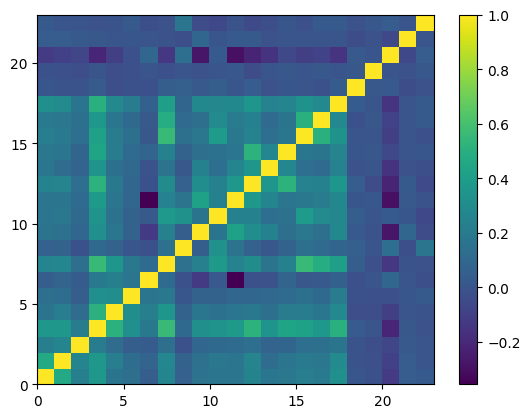

In [19]:
corr_matrix = hotel_df.drop(["visitPurpose", "eliteStatus"], axis="columns").corr()

# Create the corrplot
pcolor(corr_matrix)
colorbar()
show()

In [20]:
from sklearn.linear_model import LinearRegression as LN 
X = hotel_df["satFrontStaff"]
y = hotel_df["satOverall"]

lm = LN()
lm.fit(X.values.reshape(-1, 1), y)

print(lm.intercept_)
print(lm.coef_[0])

1.9596933252265258
0.5113664933220525


In [21]:
X = hotel_df[['satPerks', 'satFrontStaff', 'satCity']]
y = hotel_df['satOverall']

model = LN()
model.fit(X, y)

LinearRegression()

In [22]:
print("Model Coefficients:")
print(model.coef_)

# Get the model summary
print("\nModel Summary:")
print(f"Intercept: {model.intercept_:.2f}")
print("Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"{X.columns[i]}: {coef:.2f}")

r_squared = model.score(X, y)
print(f"\nR-squared: {r_squared:.2f}")

Model Coefficients:
[0.17651798 0.34742986 0.1284658 ]

Model Summary:
Intercept: 1.34
Coefficients:
satPerks: 0.18
satFrontStaff: 0.35
satCity: 0.13

R-squared: 0.29
